# Modeling: Part 1


In [13]:
# data processing
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# algorithms
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# training
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import TimeSeriesSplit

# evaluation
from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.model_selection import GridSearchCV


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

In [46]:
# half sec
#df = pd.read_pickle('/Users/lolajohnston/Documents/GitHub/ML_FINAL CHECK/half_sec_final.pkl')

In [96]:
# ten sec
df = pd.read_pickle('/Users/lolajohnston/Documents/GitHub/ML_project/ten_sec.pkl')
df.reset_index(inplace = True, drop = True)
df['time'] = df['time'].astype(float)
# we need to order by time to make splitting easier
df.sort_values(by = ['time'], inplace = True)

In [97]:
# prepare target
df['TAC_Reading_binary'] = np.array([1 if tac >= 0.08 else 0 for tac in df['TAC_Reading'].values])

In [100]:


# store indices for each split
train_1_indices = np.arange(8712, len(df))
test_1_indices = np.arange(0, 8712)
train_2_indices = np.concatenate((np.arange(0, 8712), np.arange(8712*2, len(df))))
test_2_indices = np.arange(8712, 8712*2)
train_3_indices = np.arange(0, 8712*2)
test_3_indices = np.arange(8712*2, len(df))

# how many training observations in each fold?
print('there are', len(df), 'observations in the training data')
print('phase 1 train_fold_1 will have', len(train_1_indices), 'observations')
print('phase 1 train_fold_2 will have', len(train_2_indices), 'observations')
print('phase 1 train_fold_3 will have', len(train_3_indices), 'observations')
print('phase 1 test_fold_1 will have', len(test_1_indices), 'observations')
print('phase 1 test_fold_2 will have', len(test_2_indices), 'observations')
print('phase 1 test_fold_3 will have', len(test_3_indices), 'observations')


there are 26124 observations in the training data
phase 1 train_fold_1 will have 17412 observations
phase 1 train_fold_2 will have 17412 observations
phase 1 train_fold_3 will have 17424 observations
phase 1 test_fold_1 will have 8712 observations
phase 1 test_fold_2 will have 8712 observations
phase 1 test_fold_3 will have 8700 observations


In [101]:
'''
# store indices for each split
train_1_indices = np.arange(177836, len(df))
test_1_indices = np.arange(0, 177836)
train_2_indices = np.concatenate((np.arange(0, 177836), np.arange(177836*2, len(df))))
test_2_indices = np.arange(177836, 177836*2)
train_3_indices = np.arange(0, 177836*2)
test_3_indices = np.arange(177836*2, len(df))

# how many training observations in each fold?
print('there are', len(df), 'observations in the training data')
print('phase 1 train_fold_1 will have', len(train_1_indices), 'observations')
print('phase 1 train_fold_2 will have', len(train_2_indices), 'observations')
print('phase 1 train_fold_3 will have', len(train_3_indices), 'observations')
print('phase 1 test_fold_1 will have', len(test_1_indices), 'observations')
print('phase 1 test_fold_2 will have', len(test_2_indices), 'observations')
print('phase 1 test_fold_3 will have', len(test_3_indices), 'observations')

'''

"\n# store indices for each split\ntrain_1_indices = np.arange(177836, len(df))\ntest_1_indices = np.arange(0, 177836)\ntrain_2_indices = np.concatenate((np.arange(0, 177836), np.arange(177836*2, len(df))))\ntest_2_indices = np.arange(177836, 177836*2)\ntrain_3_indices = np.arange(0, 177836*2)\ntest_3_indices = np.arange(177836*2, len(df))\n\n# how many training observations in each fold?\nprint('there are', len(df), 'observations in the training data')\nprint('phase 1 train_fold_1 will have', len(train_1_indices), 'observations')\nprint('phase 1 train_fold_2 will have', len(train_2_indices), 'observations')\nprint('phase 1 train_fold_3 will have', len(train_3_indices), 'observations')\nprint('phase 1 test_fold_1 will have', len(test_1_indices), 'observations')\nprint('phase 1 test_fold_2 will have', len(test_2_indices), 'observations')\nprint('phase 1 test_fold_3 will have', len(test_3_indices), 'observations')\n\n"

In [305]:
#len(df)*0.33348644924207627
177836

177836

In [102]:
def standardize_inputs(X_train, X_test):
    '''
    Standardize a train-test split using mean and standard deviation estimates from training data.
    Returns a tuple of standardized training and test matrices.
    '''
    scale = StandardScaler()
    scale.fit(X_train)
    X_train_scaled = scale.transform(X_train)
    X_test_scaled = scale.transform(X_test)
    return(X_train_scaled, X_test_scaled)

def data_for_modeling(train_indices, test_indices, standardize = True, multi_input = False, multi_output = False, data = df):
    '''
    Get the training and test arrays for predictors and target to feed into your model.
    Objects returned in a tuple in the following order: (X_train_objects, ..., X_test_objects, ..., y_train_objects, ..., y_test_objects)
    Standardizes X appropriately, unless standardize = False, in which case X is not standardized.
    If multi_input = True, multiple X objects are returned (to be used in wide and deep network).
    If multi_output = True, multiple y objects are returned (to be used in multi-task network).
    Does not support both multi_input and multi_output.
    '''
    # prepare target
    y_train = df.iloc[train_indices]['TAC_Reading_binary'].values
    y_test = df.iloc[test_indices]['TAC_Reading_binary'].values
    if multi_output:
        y_train_classification = df.iloc[train_indices]['TAC_Reading_binary'].values
        y_train_regression = df.iloc[train_indices]['TAC_Reading'].values
        y_test_classification = df.iloc[test_indices]['TAC_Reading_binary'].values
        y_test_regression = df.iloc[test_indices]['TAC_Reading'].values
    
    # prepare predictors
    X_train = df.iloc[train_indices].drop(['time', 'pid', 'TAC_Reading', 'TAC_Reading_binary'], axis = 1)
    X_test = df.iloc[test_indices].drop(['time', 'pid', 'TAC_Reading', 'TAC_Reading_binary'], axis = 1)
    if multi_input:
        X_train_wide = X_train.drop(['x', 'y', 'z'], axis = 1)
        X_test_wide = X_test.drop(['x', 'y', 'z'], axis = 1)    
        X_train_deep = X_train.loc[:, ['x', 'y', 'z']]
        X_test_deep = X_test.loc[:, ['x', 'y', 'z']]
    
    # standardization
    if standardize:
        if multi_input:
            X_train_wide_scaled, X_test_wide_scaled = standardize_inputs(X_train_wide, X_test_wide)
            X_train_deep_scaled, X_test_deep_scaled = standardize_inputs(X_train_deep, X_test_deep)
        else:
            X_train_scaled, X_test_scaled = standardize_inputs(X_train, X_test)

    # returns
    if multi_input:
        if standardize:
            return(X_train_wide_scaled, X_train_deep_scaled, X_test_wide_scaled, X_test_deep_scaled, y_train, y_test)
        else:
            return(X_train_wide, X_train_deep, X_test_wide, X_test_deep, y_train, y_test)
    elif multi_output:
        if standardize:
            return(X_train_scaled, X_test_scaled, y_train_classification, y_train_regression, y_test_classification, y_train_regression)
        else:
            return(X_train, X_test, y_train_classification, y_train_regression, y_test_classification, y_test_regression)
    else:
        if standardize:
            return(X_train_scaled, X_test_scaled, y_train, y_test)
        else:
            return(X_train, X_test, y_train, y_test)

In [103]:
# example how you would get data for the first cross-validation iteration/fold
#X_train, X_test, y_train, y_test = data_for_modeling(train_1_indices, test_1_indices)
# to get the data for the next fold you would just rerun, and change train_1, test_1_indices to train_2_indices, test_2_indices

# if your model doesn't require standardization (e.g. decision trees/random forests) you can turn it off
#X_train, X_test, y_train, y_test = data_for_modeling(train_1_indices, test_1_indices, standardize = False)

In [104]:
X_train_p1f1, X_test_p1f1, y_train_p1f1, y_test_p1f1 = data_for_modeling(train_1_indices, test_1_indices)

In [105]:
X_train_p1f2, X_test_p1f2, y_train_p1f2, y_test_p1f2 = data_for_modeling(train_2_indices, test_2_indices)

In [106]:
X_train_p1f3, X_test_p1f3, y_train_p1f3, y_test_p1f3 = data_for_modeling(train_3_indices, test_3_indices)

# Data Processing

We will be extracting ~25% of our data for a test set. Our data is indexed by time and different periods of time reflect very different phenomenon (notice graph below). So to make our test set more representative of the entire time period, we will create it using 3 equal-sized chunks of 2240 rows taken at time 7.4, 7.7, and 8.0 (in 1e8+1.493e12 scale).

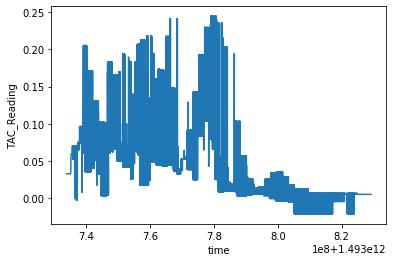

In [32]:
sns.lineplot(x = 'time', y = 'TAC_Reading', data = df)

# MODELING


In [33]:
#df_test.to_pickle('./df_test.pkl')
#df_train.to_pickle('./df_train.pkl')
#df_test_unbalanced.to_pickle('./df_test_unbalanced.pkl')
#df_train_unbalanced.to_pickle('./df_train_unbalanced.pkl')


In [37]:
'''
df_train.reset_index(inplace = True, drop = True)
df_train['time'] = df_train['time'].astype(float)
# we need to order by time to make splitting easier
df_train.sort_values(by = ['time'], inplace = True)'''

"\ndf_train.reset_index(inplace = True, drop = True)\ndf_train['time'] = df_train['time'].astype(float)\n# we need to order by time to make splitting easier\ndf_train.sort_values(by = ['time'], inplace = True)"

In [38]:
'''
# prepare target
y_raw = df_train['TAC_Reading'].values.reshape(-1,1)
y_train = np.array([1 if tac >= 0.08 else 0 for tac in y_raw])
y_time = df_train['time'].values

# onehot encode pid
encoder = OneHotEncoder(sparse = False)
pid = df_train['pid'].values.reshape(-1, 1)
pid_encoded = pd.DataFrame(encoder.fit_transform(pid))

# prepare predictors
X_train = df_train.drop(['time', 'pid', 'TAC_Reading','drunk','day','converted_time'], axis = 1)
X_accel_only = df_train.loc[:,['x', 'y', 'z']]

time = pd.DataFrame(df_train['time'].values.reshape(-1, 1))
X_time_pid = pd.concat([time, pid_encoded], axis = 1)'''

"\n# prepare target\ny_raw = df_train['TAC_Reading'].values.reshape(-1,1)\ny_train = np.array([1 if tac >= 0.08 else 0 for tac in y_raw])\ny_time = df_train['time'].values\n\n# onehot encode pid\nencoder = OneHotEncoder(sparse = False)\npid = df_train['pid'].values.reshape(-1, 1)\npid_encoded = pd.DataFrame(encoder.fit_transform(pid))\n\n# prepare predictors\nX_train = df_train.drop(['time', 'pid', 'TAC_Reading','drunk','day','converted_time'], axis = 1)\nX_accel_only = df_train.loc[:,['x', 'y', 'z']]\n\ntime = pd.DataFrame(df_train['time'].values.reshape(-1, 1))\nX_time_pid = pd.concat([time, pid_encoded], axis = 1)"

In [38]:
eval_col = ['model', 'fold', 'accuracy', 'precision (drunk)','precision (sober)', 'recall (drunk)', 'recall (sober)','support (drunk)', 'support (sober)']

In [39]:

total_eval = pd.DataFrame(columns = eval_col)

# KNN 

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [54]:
# model details
model_name = "KNeighborsClassifier"

# fold details
fold = 1

# set k range
k_range = range(5,15)

scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_p1f1,y_train_p1f1)
    y_pred=knn.predict(X_test_p1f1)
    scores[k] = metrics.accuracy_score(y_test_p1f1,y_pred)
    scores_list.append(metrics.accuracy_score(y_test_p1f1,y_pred))
    


Text(0, 0.5, 'Testing Accuracy')

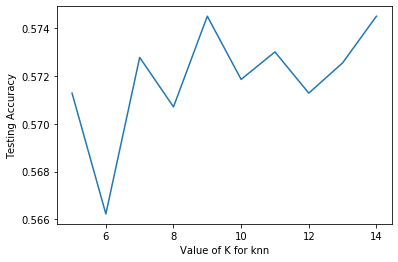

In [55]:
plt.plot(k_range,scores_list)
plt.xlabel("Value of K for knn")
plt.ylabel('Testing Accuracy')

In [56]:
# add classification report to evaluation data frame

report = classification_report(y_test_p1f1, y_pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])

In [57]:
run1 = eval_row

In [58]:
run1

array(['KNeighborsClassifier', '1', '0.5744949494949495',
       '0.5409787735849056', '0.5958646616541353', '0.4604767879548306',
       '0.6706156124391792', '3985.0', '4727.0'], dtype='<U20')

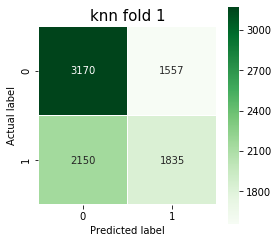

In [64]:

cm = confusion_matrix(y_test_p1f1, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True, fmt = 'g', linewidths=.8, square = True, cmap="Greens");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'knn fold 1'
plt.title(all_sample_title, size = 15)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [65]:
# Phase 1 - fold 2

# model details
model_name = "KNeighborsClassifier"

# fold details
fold = 2

# set k range
k_range = range(5,15)

scores_2 = {}
scores_list_2 = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_p1f2,y_train_p1f2)
    y_pred=knn.predict(X_test_p1f2)
    scores_2[k] = metrics.accuracy_score(y_test_p1f2,y_pred)
    scores_list_2.append(metrics.accuracy_score(y_test_p1f2,y_pred))
    

Text(0, 0.5, 'Testing Accuracy')

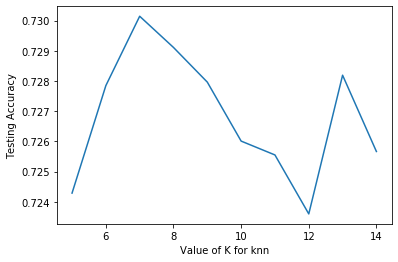

In [67]:
plt.plot(k_range,scores_list_2)
plt.xlabel("Value of K for knn")
plt.ylabel('Testing Accuracy')

In [68]:
# add classification report to evaluation data frame

report = classification_report(y_test_p1f2, y_pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
    


In [69]:
run2 = eval_row

In [70]:
# Phase 1 - fold 3

# model details
model_name = "KNeighborsClassifier"

# fold details
fold = 3

# set k range
k_range = range(5,15)

scores_3 = {}
scores_list_3 = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_p1f3,y_train_p1f3)
    y_pred=knn.predict(X_test_p1f3)
    scores_3[k] = metrics.accuracy_score(y_test_p1f3,y_pred)
    scores_list_3.append(metrics.accuracy_score(y_test_p1f3,y_pred))
    


Text(0, 0.5, 'Testing Accuracy')

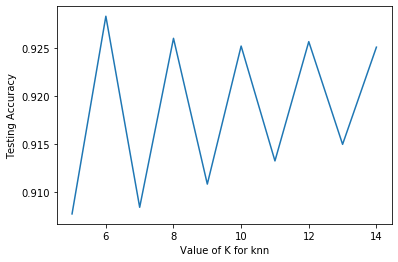

In [71]:

plt.plot(k_range,scores_list_3)
plt.xlabel("Value of K for knn")
plt.ylabel('Testing Accuracy')

In [72]:
# add classification report to evaluation data frame

report = classification_report(y_test_p1f3, y_pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [73]:
run3 = eval_row

In [74]:
run3

array(['KNeighborsClassifier', '3', '0.9250574712643678', '0.0', '1.0',
       '0.0', '0.9250574712643678', '0.0', '8700.0'], dtype='<U20')

# LOGISTIC REGRESSION

In [75]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import explained_variance_score


In [76]:
log_reg = LogisticRegression()

In [77]:
# Phase 1 - Fold 1

# model name

model_name = 'LogisticRegression()'
fold = 1

# fit model
log_reg.fit(X_train_p1f1, y_train_p1f1)
# predict
pred = log_reg.predict(X_test_p1f1)
# score
log_reg_score = log_reg.score(X_test_p1f1, y_test_p1f1) 


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:

report = classification_report(y_test_p1f1, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [79]:
run4 = eval_row

In [80]:
run4

array(['LogisticRegression()', '1', '0.5883838383838383',
       '0.5700245700245701', '0.5973051338904998', '0.4075282308657466',
       '0.740850433678866', '3985.0', '4727.0'], dtype='<U20')

In [81]:
# Phase 1 - Fold 1 Classification Report
log_reg_classreport_p1f1 = (classification_report(y_test_p1f1, pred))
print(log_reg_classreport_p1f1)

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      4727
           1       0.57      0.41      0.48      3985

    accuracy                           0.59      8712
   macro avg       0.58      0.57      0.57      8712
weighted avg       0.58      0.59      0.58      8712



In [82]:
# Phase 1 - Fold 2

# model details
model_name = 'LogisticRegression()'
fold = 2

# fit model
log_reg.fit(X_train_p1f2, y_train_p1f2)
# predict
pred = log_reg.predict(X_test_p1f2)
# score
log_reg_score = log_reg.score(X_test_p1f2, y_test_p1f2) 


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:

report = classification_report(y_test_p1f2, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [84]:
run5 = eval_row
print(run5)

['LogisticRegression()' '2' '0.7339302112029384' '0.5254604550379198'
 '0.7899796096708418' '0.4021558872305141' '0.8609523809523809' '2412.0'
 '6300.0']


In [85]:
# Phase 1 - Fold 2 Classification Report
log_reg_classreport_p1f2 = (classification_report(y_test_p1f2, pred))
print(log_reg_classreport_p1f2)

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      6300
           1       0.53      0.40      0.46      2412

    accuracy                           0.73      8712
   macro avg       0.66      0.63      0.64      8712
weighted avg       0.72      0.73      0.72      8712



In [86]:
# Phase 1 - Fold 3

# model details
model_name = 'LogisticRegression()'
fold = 3

# fit model
log_reg.fit(X_train_p1f3, y_train_p1f3)
# predict
pred = log_reg.predict(X_test_p1f3)
# score
log_reg_score = log_reg.score(X_test_p1f3, y_test_p1f3) 


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:

report = classification_report(y_test_p1f3, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [88]:
run6 = eval_row
print(run6)

['LogisticRegression()' '3' '0.9560919540229885' '0.0' '1.0' '0.0'
 '0.9560919540229885' '0.0' '8700.0']


In [89]:
# Phase 1 - Fold 3 Classification Report
log_reg_classreport_p1f3 = (classification_report(y_test_p1f3, pred))
print(log_reg_classreport_p1f3)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8700
           1       0.00      0.00      0.00         0

    accuracy                           0.96      8700
   macro avg       0.50      0.48      0.49      8700
weighted avg       1.00      0.96      0.98      8700



# RANDOM FOREST CLASSIFIER

In [90]:
rfc = RandomForestClassifier()

In [91]:
# Phase 1 - Fold 1

# model details
model_name = 'RandomForestClassifier()'
fold = 1

# fit model
rfc.fit(X_train_p1f1, y_train_p1f1)
# predict
pred = rfc.predict(X_test_p1f1)
# score
rfc_score = rfc.score(X_test_p1f1, y_test_p1f1) # score of predictions

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [92]:

report = classification_report(y_test_p1f1, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [93]:
run7 = eval_row

In [94]:
run7

array(['RandomForestClassifier()', '1', '0.5957300275482094',
       '0.5896244676732482', '0.5983031489639419', '0.3821831869510665',
       '0.7757562936323249', '3985.0', '4727.0'], dtype='<U24')

In [95]:
# Phase 1 - Fold 1 Classification Report
rfc_classreport_p1f1 = (classification_report(y_test_p1f1, pred))
print(rfc_classreport_p1f1)

              precision    recall  f1-score   support

           0       0.60      0.78      0.68      4727
           1       0.59      0.38      0.46      3985

    accuracy                           0.60      8712
   macro avg       0.59      0.58      0.57      8712
weighted avg       0.59      0.60      0.58      8712



In [96]:
# Phase 1 - Fold 2

# model details
model_name = 'RandomForestClassifier()'
fold = 2
# fit model
rfc.fit(X_train_p1f2, y_train_p1f2)
# predict
pred = rfc.predict(X_test_p1f2)
# score
rfc_score = rfc.score(X_test_p1f2, y_test_p1f2) # score of predictions

In [97]:

report = classification_report(y_test_p1f2, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [98]:
run8 = eval_row
print(run8)

['RandomForestClassifier()' '2' '0.7463269054178145' '0.5744837758112095'
 '0.7780043501903209' '0.32296849087893864' '0.9084126984126984' '2412.0'
 '6300.0']


In [99]:
# Phase 1 - Fold 2 Classification Report
rfc_classreport_p1f2 = (classification_report(y_test_p1f2, pred))
print(rfc_classreport_p1f2)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      6300
           1       0.57      0.32      0.41      2412

    accuracy                           0.75      8712
   macro avg       0.68      0.62      0.63      8712
weighted avg       0.72      0.75      0.72      8712



In [100]:
# Phase 1 - Fold 3
# model details
model_name = 'RandomForestClassifier()'
fold = 3
# fit model
rfc.fit(X_train_p1f3, y_train_p1f3)
# predict
pred = rfc.predict(X_test_p1f3)
# score
rfc_score = rfc.score(X_test_p1f3, y_test_p1f3) # score of predictions

In [101]:

report = classification_report(y_test_p1f3, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [102]:
run9 = eval_row
print(run9)

['RandomForestClassifier()' '3' '0.9539080459770115' '0.0' '1.0' '0.0'
 '0.9539080459770115' '0.0' '8700.0']


In [103]:
# Phase 1 - Fold 3 Classification Report
rfc_classreport_p1f3 = (classification_report(y_test_p1f3, pred))
print(rfc_classreport_p1f3)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      8700
           1       0.00      0.00      0.00         0

    accuracy                           0.95      8700
   macro avg       0.50      0.48      0.49      8700
weighted avg       1.00      0.95      0.98      8700



# RANDOM FOREST - ADABOOST
 - ADA BOOST

In [104]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing,metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [105]:
# normal Random Forest (no grid search) with AdaBoostClassifier()

# create Random Forest model 
rf_abc= AdaBoostClassifier()

In [106]:
# Phase 1 - Fold 1
# model details
model_name = 'AdaBoostClassifier()'
fold = 1
# fit model
rf_abc.fit(X_train_p1f1, y_train_p1f1)
# predict
pred = rf_abc.predict(X_test_p1f1)
# score
rf_abc_score = rf_abc.score(X_test_p1f1, y_test_p1f1) # score of predictions


In [107]:
report = classification_report(y_test_p1f1, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [108]:
run10 = eval_row
print(run10)

['AdaBoostClassifier()' '1' '0.5952708907254362' '0.576271186440678'
 '0.605295458530598' '0.4351317440401506' '0.7302729003596361' '3985.0'
 '4727.0']


In [109]:
# Phase 1 - Fold 1 Classification Report
rf_abc_classreport_p1f1 = (classification_report(y_test_p1f1, pred))
print(rf_abc_classreport_p1f1)

              precision    recall  f1-score   support

           0       0.61      0.73      0.66      4727
           1       0.58      0.44      0.50      3985

    accuracy                           0.60      8712
   macro avg       0.59      0.58      0.58      8712
weighted avg       0.59      0.60      0.59      8712



In [110]:
# Phase 1 - Fold 2

# model details
model_name = 'AdaBoostClassifier()'
fold = 2
# fit model
rf_abc.fit(X_train_p1f2, y_train_p1f2)
# predict
pred = rf_abc.predict(X_test_p1f2)
# score
rf_abc_score = rf_abc.score(X_test_p1f2, y_test_p1f2) # score of predictions


In [111]:
report = classification_report(y_test_p1f2, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [112]:
run11 = eval_row
print(run11)

['AdaBoostClassifier()' '2' '0.7428833792470156' '0.5438328236493374'
 '0.8007407407407408' '0.4423714759535655' '0.8579365079365079' '2412.0'
 '6300.0']


In [113]:
# Phase 1 - Fold 2 Classification Report
rf_abc_classreport_p1f2 = (classification_report(y_test_p1f2, pred))
print(rf_abc_classreport_p1f2)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6300
           1       0.54      0.44      0.49      2412

    accuracy                           0.74      8712
   macro avg       0.67      0.65      0.66      8712
weighted avg       0.73      0.74      0.73      8712



In [114]:
# Phase 1 - Fold 3
model_name = 'AdaBoostClassifier()'
fold = 3
# fit model
rf_abc.fit(X_train_p1f3, y_train_p1f3)
# predict
pred = rf_abc.predict(X_test_p1f3)
# score
rf_abc_score = rf_abc.score(X_test_p1f3, y_test_p1f3) # score of predictions

In [115]:
report = classification_report(y_test_p1f3, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [116]:
run12 = eval_row
print(run12)

['AdaBoostClassifier()' '3' '0.9341379310344827' '0.0' '1.0' '0.0'
 '0.9341379310344827' '0.0' '8700.0']


In [117]:
# Phase 1 - Fold 3 Classification Report
rf_abc_classreport_p1f3 = (classification_report(y_test_p1f3, pred))
print(rf_abc_classreport_p1f3)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      8700
           1       0.00      0.00      0.00         0

    accuracy                           0.93      8700
   macro avg       0.50      0.47      0.48      8700
weighted avg       1.00      0.93      0.97      8700



# SUPPORT VECTOR MACHINES

In [118]:
from sklearn.svm import SVC

svc = SVC()

In [119]:
# Phase 1 - Fold 1
model_name = 'SVC()'
fold = 1
# fit model
svc.fit(X_train_p1f1, y_train_p1f1)
# predict
pred = svc.predict(X_test_p1f1)
# score
svc_score = svc.score(X_test_p1f1, y_test_p1f1) # score of predictions


In [123]:
report = classification_report(y_test_p1f1, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [124]:
run13 = eval_row
print(run13)

['SVC()' '1' '0.5960743801652892' '0.5755512321660181' '0.607320540156361'
 '0.4454203262233375' '0.7230801777025597' '3985.0' '4727.0']


In [125]:
# Phase 1 - Fold 1 Classification Report
svc_classreport_p1f1 = (classification_report(y_test_p1f1, pred))
print(svc_classreport_p1f1)

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      4727
           1       0.58      0.45      0.50      3985

    accuracy                           0.60      8712
   macro avg       0.59      0.58      0.58      8712
weighted avg       0.59      0.60      0.59      8712



In [126]:
# Phase 1 - Fold 2
model_name = 'SVC()'
fold = 2
# fit model
svc.fit(X_train_p1f2, y_train_p1f2)
# predict
pred = svc.predict(X_test_p1f2)
# score
svc_score = svc.score(X_test_p1f2, y_test_p1f2) # score of predictions

In [127]:
report = classification_report(y_test_p1f2, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [128]:
run14 = eval_row
print(run14)

['SVC()' '2' '0.754247015610652' '0.5746556473829201' '0.8015079019863709'
 '0.4324212271973466' '0.8774603174603175' '2412.0' '6300.0']


In [129]:
# Phase 1 - Fold 2 Classification Report
svc_classreport_p1f2 = (classification_report(y_test_p1f2, pred))
print(svc_classreport_p1f2)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      6300
           1       0.57      0.43      0.49      2412

    accuracy                           0.75      8712
   macro avg       0.69      0.65      0.67      8712
weighted avg       0.74      0.75      0.74      8712



In [130]:
# Phase 1 - Fold 3
model_name = 'SVC()'
fold = 3
# fit model
svc.fit(X_train_p1f3, y_train_p1f3)
# predict
pred = svc.predict(X_test_p1f3)
# score
svc_score = svc.score(X_test_p1f3, y_test_p1f3) # score of predictions

In [131]:
report = classification_report(y_test_p1f3, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [132]:
run15 = eval_row
print(run15)

['SVC()' '3' '0.9335632183908046' '0.0' '1.0' '0.0' '0.9335632183908046'
 '0.0' '8700.0']


In [133]:
# Phase 1 - Fold 3 Classification Report
svc_classreport_p1f3 = (classification_report(y_test_p1f3, pred))
print(svc_classreport_p1f3)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      8700
           1       0.00      0.00      0.00         0

    accuracy                           0.93      8700
   macro avg       0.50      0.47      0.48      8700
weighted avg       1.00      0.93      0.97      8700



# NAIVE BAYES

- GaussianNB


In [134]:
gnb = GaussianNB()


In [135]:
# Phase 1 - Fold 1
model_name = 'GaussianNB()'
fold = 1
# fit model
gnb.fit(X_train_p1f1, y_train_p1f1)
# predict
pred = gnb.predict(X_test_p1f1)
# score
gnb_score = gnb.score(X_test_p1f1, y_test_p1f1) # score of predictions


In [136]:
report = classification_report(y_test_p1f1, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [137]:
run16 = eval_row
print(run16)

['GaussianNB()' '1' '0.59400826446281' '0.551779935275081'
 '0.6356589147286822' '0.5989962358845671' '0.5898032578802623' '3985.0'
 '4727.0']


In [138]:
# Phase 1 - Fold 1 Classification Report
gnb_classreport_p1f1 = (classification_report(y_test_p1f1, pred))
print(gnb_classreport_p1f1)

              precision    recall  f1-score   support

           0       0.64      0.59      0.61      4727
           1       0.55      0.60      0.57      3985

    accuracy                           0.59      8712
   macro avg       0.59      0.59      0.59      8712
weighted avg       0.60      0.59      0.59      8712



In [139]:
# Phase 1 - Fold 2
model_name = 'GaussianNB()'
fold = 2
# fit model
gnb.fit(X_train_p1f2, y_train_p1f2)
# predict
pred = gnb.predict(X_test_p1f2)
# score
gnb_score = gnb.score(X_test_p1f2, y_test_p1f2) # score of predictions


In [140]:
report = classification_report(y_test_p1f2, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [141]:
run17 = eval_row
print(run17)

['GaussianNB()' '2' '0.7532139577594124' '0.5374713958810069'
 '0.8978144171779141' '0.7790215588723052' '0.7433333333333333' '2412.0'
 '6300.0']


In [142]:
# Phase 1 - Fold 2 Classification Report
gnb_classreport_p1f2 = (classification_report(y_test_p1f2, pred))
print(gnb_classreport_p1f2)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      6300
           1       0.54      0.78      0.64      2412

    accuracy                           0.75      8712
   macro avg       0.72      0.76      0.72      8712
weighted avg       0.80      0.75      0.76      8712



In [143]:
# Phase 1 - Fold 3
model_name = 'GaussianNB()'
fold = 3
# fit model
gnb.fit(X_train_p1f3, y_train_p1f3)
# predict
pred = gnb.predict(X_test_p1f3)
# score
gnb_score = gnb.score(X_test_p1f3, y_test_p1f3) # score of predictions


In [144]:
report = classification_report(y_test_p1f3, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [145]:
run18 = eval_row
print(run18)

['GaussianNB()' '3' '0.9352873563218391' '0.0' '1.0' '0.0'
 '0.9352873563218391' '0.0' '8700.0']


In [146]:
# Phase 1 - Fold 3 Classification Report
gnb_classreport_p1f3 = (classification_report(y_test_p1f3, pred))
print(gnb_classreport_p1f3)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8700
           1       0.00      0.00      0.00         0

    accuracy                           0.94      8700
   macro avg       0.50      0.47      0.48      8700
weighted avg       1.00      0.94      0.97      8700



# GRADIENT BOOST

In [148]:
gbc = GradientBoostingClassifier()

In [149]:
# Phase 1 - Fold 1
model_name = 'GradientBoostingClassifier()'
fold = 1
# fit model
gbc.fit(X_train_p1f1, y_train_p1f1)
# predict
pred = gbc.predict(X_test_p1f1)
# score
gbc_score = gbc.score(X_test_p1f1, y_test_p1f1) # score of predictions


In [150]:
report = classification_report(y_test_p1f1, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [151]:
run19 = eval_row
print(run19)

['GradientBoostingClassifier()' '1' '0.6014692378328742'
 '0.5869786368260427' '0.6088842616692695' '0.4343789209535759'
 '0.7423312883435583' '3985.0' '4727.0']


In [152]:
# Phase 1 - Fold 1 Classification Report
gbc_classreport_p1f1 = (classification_report(y_test_p1f1, pred))
print(gbc_classreport_p1f1)

              precision    recall  f1-score   support

           0       0.61      0.74      0.67      4727
           1       0.59      0.43      0.50      3985

    accuracy                           0.60      8712
   macro avg       0.60      0.59      0.58      8712
weighted avg       0.60      0.60      0.59      8712



In [153]:
# Phase 1 - Fold 2
model_name = 'GradientBoostingClassifier()'
fold = 2
# fit model
gbc.fit(X_train_p1f2, y_train_p1f2)
# predict
pred = gbc.predict(X_test_p1f2)
# score
gbc_score = gbc.score(X_test_p1f2, y_test_p1f2) # score of predictions


In [154]:
report = classification_report(y_test_p1f2, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [155]:
run20 = eval_row
print(run20)

['GradientBoostingClassifier()' '2' '0.7449494949494949'
 '0.5542857142857143' '0.7928756104567652' '0.4021558872305141'
 '0.8761904761904762' '2412.0' '6300.0']


In [156]:
# Phase 1 - Fold 2 Classification Report
gbc_classreport_p1f2 = (classification_report(y_test_p1f2, pred))
print(gbc_classreport_p1f2)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      6300
           1       0.55      0.40      0.47      2412

    accuracy                           0.74      8712
   macro avg       0.67      0.64      0.65      8712
weighted avg       0.73      0.74      0.73      8712



In [157]:
# Phase 1 - Fold 3
model_name = 'GradientBoostingClassifier()'
fold = 3
# fit model
gbc.fit(X_train_p1f3, y_train_p1f3)
# predict
pred = gbc.predict(X_test_p1f3)
# score
gbc_score = gbc.score(X_test_p1f3, y_test_p1f3) # score of predictions


In [158]:
report = classification_report(y_test_p1f3, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [159]:
run21 = eval_row
print(run21)

['GradientBoostingClassifier()' '3' '0.9519540229885057' '0.0' '1.0' '0.0'
 '0.9519540229885057' '0.0' '8700.0']


In [160]:
# Phase 1 - Fold 3 Classification Report
gbc_classreport_p1f3 = (classification_report(y_test_p1f3, pred))
print(gbc_classreport_p1f3)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      8700
           1       0.00      0.00      0.00         0

    accuracy                           0.95      8700
   macro avg       0.50      0.48      0.49      8700
weighted avg       1.00      0.95      0.98      8700



In [162]:
total_eval

,model,fold,accuracy,precision (drunk),precision (sober),recall (drunk),recall (sober),support (drunk),support (sober)


In [163]:
total_results = total_eval.append(pd.DataFrame([run1, run2, run3, run4, run5, run6, run7, run8, run9, run10,
                               run11,run12,run13,run14,run15,run16,run17,run18,run19,run20,run21],columns = eval_col))

In [164]:
total_results['accuracy'] = total_results['accuracy'].astype(float).round(6)
total_results['precision (drunk)'] = total_results['precision (drunk)'].astype(float).round(6)
total_results['precision (sober)'] = total_results['precision (sober)'].astype(float).round(6)
total_results['recall (drunk)'] = total_results['recall (drunk)'].astype(float).round(6)
total_results['recall (sober)'] = total_results['recall (sober)'].astype(float).round(6)


In [165]:
total_results.to_pickle('./results.pkl')

In [5]:
test = pd.read_pickle('/Users/lolajohnston/Documents/GitHub/ML_project-master/results.pkl')


In [118]:
test.set_value(2, 'recall (drunk)', 1)
test.set_value(5, 'recall (drunk)', 1)
test.set_value(8, 'recall (drunk)', 1)
test.set_value(11, 'recall (drunk)', 1)
test.set_value(14, 'recall (drunk)', 1)
test.set_value(17, 'recall (drunk)', 1)
test.set_value(20, 'recall (drunk)', 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_

,model,fold,accuracy,precision (drunk),precision (sober),recall (drunk),recall (sober),support (drunk),support (sober)
0,KNeighborsClassifier,1,0.574495,0.540979,0.595865,0.460477,0.670616,3985.0,4727.0
1,KNeighborsClassifier,2,0.725666,0.505561,0.790318,0.414594,0.844762,2412.0,6300.0
2,KNeighborsClassifier,3,0.925057,0.000000,1.000000,1.000000,0.925057,0.0,8700.0
3,LogisticRegression(),1,0.588384,0.570025,0.597305,0.407528,0.740850,3985.0,4727.0
4,LogisticRegression(),2,0.733930,0.525460,0.789980,0.402156,0.860952,2412.0,6300.0
5,LogisticRegression(),3,0.956092,0.000000,1.000000,1.000000,0.956092,0.0,8700.0
6,RandomForestClassifier(),1,0.595730,0.589624,0.598303,0.382183,0.775756,3985.0,4727.0
7,RandomForestClassifier(),2,0.746327,0.574484,0.778004,0.322968,0.908413,2412.0,6300.0
8,RandomForestClassifier(),3,0.953908,0.000000,1.000000,1.000000,0.953908,0.0,8700.0
9,AdaBoostClassifier(),1,0.595271,0.576271,0.605295,0.435132,0.730273,3985.0,4727.0


In [122]:
results_table = test.drop(['fold','support (sober)','support (drunk)'], axis = 1)

In [123]:
results_table.groupby('model', as_index = False).agg(np.mean)

,model,accuracy,precision (drunk),precision (sober),recall (drunk),recall (sober)
0,AdaBoostClassifier(),0.757431,0.373368,0.802012,0.625834,0.840783
1,GaussianNB(),0.760836,0.363084,0.844491,0.792673,0.756141
2,GradientBoostingClassifier(),0.766124,0.380422,0.800587,0.612178,0.856825
3,KNeighborsClassifier,0.741739,0.348847,0.795394,0.625024,0.813478
4,LogisticRegression(),0.759469,0.365162,0.795762,0.603228,0.852631
5,RandomForestClassifier(),0.765322,0.388036,0.792102,0.568384,0.879359
6,SVC(),0.761295,0.383402,0.802943,0.625947,0.844701


In [124]:
results_table.to_pickle('./results_table.pkl')

# TUNED RANDOM FOREST - 10 SEC

In [24]:
forest = RandomForestClassifier()

In [107]:
model_name = 'RandomForestClassifier'
fold = '1 - tuned'

n_estimators = [10, 20]
max_depth = [10, 15]
min_samples_split = [5]
min_samples_leaf = [10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_p1f1, y_train_p1f1)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.0s finished


In [108]:
y_pred= bestF.predict(X_test_p1f1)

In [109]:

report = classification_report(y_test_p1f1, y_pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [110]:
forest_1_HALF = eval_row
print(forest_1_HALF)

['RandomForestClassifier' '1 - tuned' '0.6179981634527089'
 '0.6114692908042076' '0.6213356461405031' '0.4521957340025094'
 '0.757774486989634' '3985.0' '4727.0']


In [29]:
# forest2
model_name = 'RandomForestClassifier'
fold = '2 - tuned'


n_estimators = [10, 20]
max_depth = [15]
min_samples_split = [2]
min_samples_leaf = [5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_p1f2, y_train_p1f2)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.3s finished


In [30]:
y_pred= bestF.predict(X_test_p1f2)

In [31]:

report = classification_report(y_test_p1f2, y_pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [32]:
forest_2 = eval_row
print(forest_2)

['RandomForestClassifier' '2 - tuned' '0.7622819100091828'
 '0.6160653505786249' '0.7919370426618805' '0.3752072968490879'
 '0.9104761904761904' '2412.0' '6300.0']


In [33]:
# forest3


model_name = 'RandomForestClassifier'
fold = '3 - tuned'


n_estimators = [10, 20]
max_depth = [15]
min_samples_split = [2]
min_samples_leaf = [5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_p1f3, y_train_p1f3)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.1s finished


In [34]:
y_pred= bestF.predict(X_test_p1f3)

In [35]:

report = classification_report(y_test_p1f3, y_pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [36]:
forest_3 = eval_row
print(forest_3)

['RandomForestClassifier' '3 - tuned' '0.9562068965517241' '0.0' '1.0'
 '0.0' '0.9562068965517241' '0.0' '8700.0']


In [40]:
forest_eval = pd.DataFrame(columns = eval_col)

In [41]:
forest_eval = forest_eval.append(pd.DataFrame([forest_1, forest_2, forest_3],columns = eval_col))

In [42]:
forest_eval['accuracy'] = forest_eval['accuracy'].astype(float).round(6)
forest_eval['precision (drunk)'] = forest_eval['precision (drunk)'].astype(float).round(6)
forest_eval['precision (sober)'] = forest_eval['precision (sober)'].astype(float).round(6)
forest_eval['recall (drunk)'] = forest_eval['recall (drunk)'].astype(float).round(6)
forest_eval['recall (sober)'] = forest_eval['recall (sober)'].astype(float).round(6)


In [86]:
forest_eval

,model,fold,accuracy,precision (drunk),precision (sober),recall (drunk),recall (sober),support (drunk),support (sober)
0,RandomForestClassifier,1 - tuned,0.612948,0.605218,0.616830,0.442409,0.756717,3985.0,4727.0
1,RandomForestClassifier,2 - tuned,0.762282,0.616065,0.791937,0.375207,0.910476,2412.0,6300.0
2,RandomForestClassifier,3 - tuned,0.956207,0.000000,1.000000,0.000000,0.956207,0.0,8700.0


In [87]:
forest_eval.set_value(2,'recall (drunk)',1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,model,fold,accuracy,precision (drunk),precision (sober),recall (drunk),recall (sober),support (drunk),support (sober)
0,RandomForestClassifier,1 - tuned,0.612948,0.605218,0.616830,0.442409,0.756717,3985.0,4727.0
1,RandomForestClassifier,2 - tuned,0.762282,0.616065,0.791937,0.375207,0.910476,2412.0,6300.0
2,RandomForestClassifier,3 - tuned,0.956207,0.000000,1.000000,1.000000,0.956207,0.0,8700.0


In [90]:
checkone = forest_eval.groupby('model', as_index = False).agg(np.mean)

In [ ]:
#forest_eval.to_pickle('./forest_results.pkl')

In [7]:
#tuned_forest_10 = pd.read_pickle('/Users/lolajohnston/Documents/GitHub/ML_project-master/forest_results.pkl')


In [89]:
tuned_forest_10.groupby('model', as_index = False).agg(np.mean)

,model,accuracy,precision (drunk),precision (sober),recall (drunk),recall (sober)
0,RandomForestClassifier,0.773896,0.395047,0.80619,0.629484,0.859633


# TUNED RANDOM FOREST - 1/2 SEC

In [57]:
model_name = 'RandomForestClassifier'
fold = '1 - tuned HALF'

n_estimators = [10, 20]
max_depth = [10, 15]
min_samples_split = [5]
min_samples_leaf = [10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_p1f1, y_train_p1f1)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.1min finished


In [61]:
y_pred= bestF.predict(X_test_p1f1)

In [62]:
forest_tuned_half1 = eval_row
print(forest_tuned_half1)

['RandomForestClassifier' '1 - tuned HALF' '0.6060808835106503'
 '0.6016268941439009' '0.6081050134947248' '0.41095553615990754'
 '0.7705852480593642' '81347.0' '96489.0']


In [65]:
model_name = 'RandomForestClassifier'
fold = '2 - tuned HALF'

n_estimators = [10, 20]
max_depth = [10, 15]
min_samples_split = [5]
min_samples_leaf = [10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_p1f2, y_train_p1f2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.7min finished


In [69]:
pred= bestF.predict(X_test_p1f2)

In [70]:

report = classification_report(y_test_p1f2, pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

In [71]:
forest_tuned_half2 = eval_row
print(forest_tuned_half2)

['RandomForestClassifier' '2 - tuned HALF' '0.7772666951573359'
 '0.6374129980236588' '0.8114299308019003' '0.45227111065948583'
 '0.9015867092691497' '49205.0' '128631.0']


In [72]:
model_name = 'RandomForestClassifier'
fold = '3 - tuned HALF'


n_estimators = [10, 20]
max_depth = [15]
min_samples_split = [2]
min_samples_leaf = [5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_p1f3, y_train_p1f3)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.0min finished


In [74]:
y_pred= bestF.predict(X_test_p1f3)

In [75]:

report = classification_report(y_test_p1f3, y_pred, output_dict = True)

eval_df = pd.DataFrame(report).transpose()

to_acc = eval_df['precision'].iloc[2]
dr_pr = eval_df['precision'].iloc[1]
so_pr = eval_df['precision'].iloc[0]
dr_re = eval_df['recall'].iloc[1]
so_re = eval_df['recall'].iloc[0]
dr_su = eval_df['support'].iloc[1]
so_su = eval_df['support'].iloc[0]
    
eval_row = np.array([model_name, fold, to_acc, dr_pr, so_pr, dr_re, so_re, dr_su, so_su])
   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [76]:
forest_tuned_half3 = eval_row
print(forest_tuned_half3)

['RandomForestClassifier' '3 - tuned HALF' '0.9380775143164427' '0.0'
 '1.0' '0.0' '0.9380775143164427' '0.0' '177593.0']


In [77]:
forest_tuned_half = pd.DataFrame(columns = eval_col)

In [79]:
forest_tuned_half = forest_tuned_half.append(pd.DataFrame([forest_tuned_half1, forest_tuned_half2,forest_tuned_half3],columns = eval_col))

In [80]:
forest_tuned_half

,model,fold,accuracy,precision (drunk),precision (sober),recall (drunk),recall (sober),support (drunk),support (sober)
0,RandomForestClassifier,1 - tuned HALF,0.6060808835106503,0.6016268941439009,0.6081050134947248,0.41095553615990754,0.7705852480593642,81347.0,96489.0
1,RandomForestClassifier,2 - tuned HALF,0.7772666951573359,0.6374129980236588,0.8114299308019003,0.45227111065948583,0.9015867092691497,49205.0,128631.0
2,RandomForestClassifier,3 - tuned HALF,0.9380775143164427,0.0,1.0,0.0,0.9380775143164427,0.0,177593.0


In [82]:
forest_tuned_half.set_value(2, 'recall (drunk)', 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,model,fold,accuracy,precision (drunk),precision (sober),recall (drunk),recall (sober),support (drunk),support (sober)
0,RandomForestClassifier,1 - tuned HALF,0.6060808835106503,0.6016268941439009,0.6081050134947248,0.41095553615990754,0.7705852480593642,81347.0,96489.0
1,RandomForestClassifier,2 - tuned HALF,0.7772666951573359,0.6374129980236588,0.8114299308019003,0.45227111065948583,0.9015867092691497,49205.0,128631.0
2,RandomForestClassifier,3 - tuned HALF,0.9380775143164427,0.0,1.0,1,0.9380775143164427,0.0,177593.0


In [81]:
forest_tuned_half.to_pickle('./forest_tuned_half_results.pkl')

In [83]:
forest_tuned_half['accuracy'] = forest_tuned_half['accuracy'].astype(float).round(6)
forest_tuned_half['precision (drunk)'] = forest_tuned_half['precision (drunk)'].astype(float).round(6)
forest_tuned_half['precision (sober)'] = forest_tuned_half['precision (sober)'].astype(float).round(6)
forest_tuned_half['recall (drunk)'] = forest_tuned_half['recall (drunk)'].astype(float).round(6)
forest_tuned_half['recall (sober)'] = forest_tuned_half['recall (sober)'].astype(float).round(6)


In [84]:
forest_tuned_half = forest_tuned_half.drop(['fold','support (sober)','support (drunk)'], axis = 1)

In [94]:
checktwo = forest_tuned_half.groupby('model', as_index = False).agg(np.mean)

In [93]:
checkone

,model,accuracy,precision (drunk),precision (sober),recall (drunk),recall (sober)
0,RandomForestClassifier,0.777146,0.407094,0.802922,0.605872,0.874467


In [95]:
checktwo

,model,accuracy,precision (drunk),precision (sober),recall (drunk),recall (sober)
0,RandomForestClassifier,0.773809,0.413013,0.806512,0.621076,0.870083
